In [1]:
# 对应retrain文件夹
# 双击执行retrain.bat脚本  G:\Anaconda3\My_Jupyter\retrain\retrain.bat
# 执行这段代码
# 注：如果之前运行过，会在当前盘下有一个tmp文件 删掉里面的内容再继续运行

In [2]:
# 训练自己的图片分类模型的方法：
# 从无到有。           先准备一个图片分类的模型，比如inception或者Alexnet或者。。。
# (Train from scratch)) 确定模型的框架，参数都是没有训练过的初始化的随机值，用自己的数据集从头开始训练，得到自己的参数
#                      优：按需求训练    缺：要求数据集非常庞大（百万千万级别）、训练时间非常长
# 改造已训练好的模型，定卷积层参数。还做分类的话，卷积层参数都是“好”参数，不动它，只训练自己新写的那部分参数。
# (Fine-tune a model) 如果改造的inception还是做图像分类，那这个网络中大量的参数都是非常好的参数，都是imagenet训练过的参数，不要改变了
#                     卷积层主要的作用就是提取图像特征，所以前面那些卷积层参数都是适用的
#                     跟softmax平行添加一支，比如我们只做5分类，搞5个全连接的神经元，只训练自己新写的最后一块的参数就ok
# 改造已训练好的模型，小学习率变卷积层参数。所有参数都参与训练，因为卷积层的参数较好，所以学习率较小，着重训练新写的层
# (Retrain a model)

# 数据集下载：http://www.robots.ox.ac.uk/~vgg/data/

# tensorflow中/examples/image_retraining/retrain.py下载：https://github.com/tensorflow/tensorflow/tree/r1.8

In [3]:
# 我们这里用第二种方式训练模型 
# 根据这种方法的原理可知，从tensorboard看，pool_3以下的参数不会变，即某一张图从pool_3出来时的参数是固定的
# 显然 我们训练后续网络用的值不是原始图片 而是pool_3的输出值 我们先算好这一堆值吧

In [4]:
# 这里G:\Anaconda3\My_Jupyter\retrain 有一个windows的批处理文件retrain.bat
# windows批处理文件 用python执行retrain.py
# python G:/Anaconda3/My_Jupyter/tensorflow-master/tensorflow/examples/image_retraining/retrain.py ^
# 在Google定义的花瓶的瓶颈处 也就是pool_3的输出处 记录程序的输出值 放在bottleneck中
# --bottleneck_dir bottleneck ^
# 训练批次200
# --how_many_training_steps 200 ^
# 运用这个路径下的模型 据说检测的是压缩包
# --model_dir G:/Anaconda3/My_Jupyter/inception_model/ ^
# 训练好的模型命名output_graph.pb 
# --output_graph output_graph.pb ^
# 输出一个标签
# --output_labels output_labels.txt ^
# 传入的要分类的图片保存在
# --image_dir data/train/
# pause

# 这个操作其实就是得到从瓶颈pool_3卡一下的值 数值就是bottleneck 图是output_graph.pb 标签是output_labels.txt

In [5]:
import tensorflow as tf
import os                      # operating system 不用关心用户的操作系统了
import numpy as np             # 科学计算包
import re                      # 正则包
from PIL import  Image
import matplotlib.pyplot as plt

retrain/image/face_1.jpg


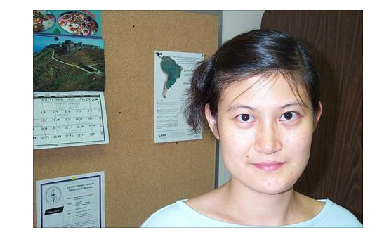

[1 2 3 0 4]
faces (script = 0.96057)
flowers (script = 0.01321)
horses (script = 0.01161)
airplane (script = 0.00795)
motorbikes (script = 0.00666)

retrain/image/flower_1.jpg


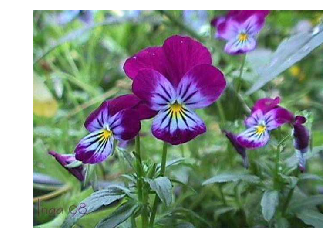

[2 4 3 1 0]
flowers (script = 0.98863)
motorbikes (script = 0.00337)
horses (script = 0.00307)
faces (script = 0.00266)
airplane (script = 0.00227)

retrain/image/flower_2.jpg


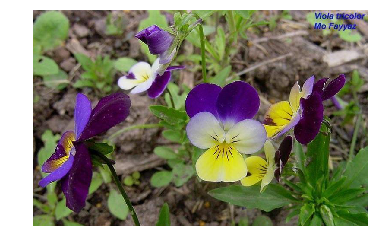

[2 3 1 4 0]
flowers (script = 0.99040)
horses (script = 0.00319)
faces (script = 0.00295)
motorbikes (script = 0.00224)
airplane (script = 0.00122)

retrain/image/horse_1.jpg


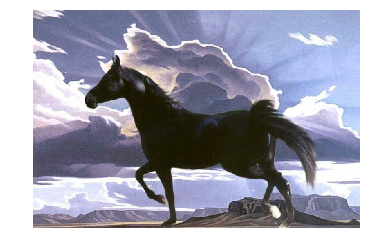

[3 2 4 1 0]
horses (script = 0.71407)
flowers (script = 0.11694)
motorbikes (script = 0.07030)
faces (script = 0.05867)
airplane (script = 0.04001)

retrain/image/horse_2.jpg


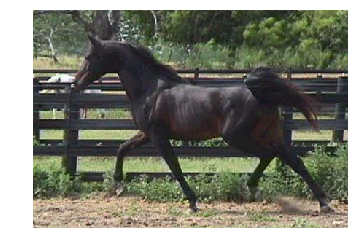

[3 2 1 4 0]
horses (script = 0.97988)
flowers (script = 0.00559)
faces (script = 0.00511)
motorbikes (script = 0.00483)
airplane (script = 0.00458)

retrain/image/image_00434.jpg


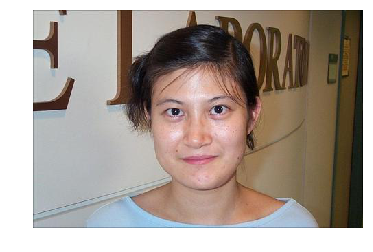

[1 3 2 0 4]
faces (script = 0.96297)
horses (script = 0.01335)
flowers (script = 0.01319)
airplane (script = 0.00640)
motorbikes (script = 0.00408)

retrain/image/motorbikes_1.jpg


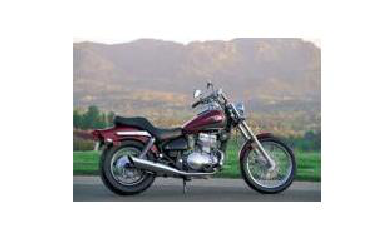

[4 3 0 1 2]
motorbikes (script = 0.95988)
horses (script = 0.01722)
airplane (script = 0.00808)
faces (script = 0.00800)
flowers (script = 0.00683)

retrain/image/motorbikes_2.jpg


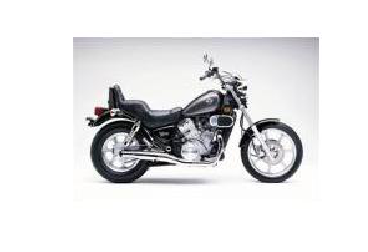

[4 3 0 1 2]
motorbikes (script = 0.97271)
horses (script = 0.00856)
airplane (script = 0.00667)
faces (script = 0.00605)
flowers (script = 0.00602)

retrain/image/plane1.jpg


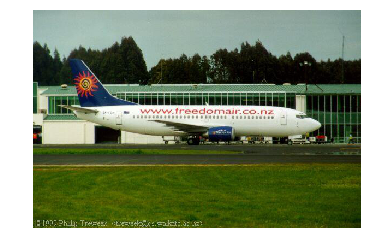

[0 1 3 4 2]
airplane (script = 0.97649)
faces (script = 0.00646)
horses (script = 0.00613)
motorbikes (script = 0.00576)
flowers (script = 0.00516)

retrain/image/plane2.jpg


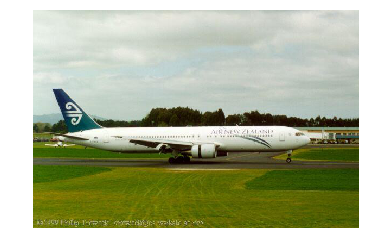

[0 1 2 4 3]
airplane (script = 0.97792)
faces (script = 0.00599)
flowers (script = 0.00555)
motorbikes (script = 0.00529)
horses (script = 0.00525)

retrain/image/傻子.jpg


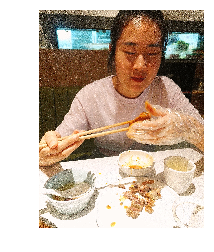

[1 0 2 3 4]
faces (script = 0.35263)
airplane (script = 0.21117)
flowers (script = 0.17799)
horses (script = 0.16690)
motorbikes (script = 0.09131)



In [6]:
lines = tf.gfile.GFile('retrain/output_labels.txt').readlines()
uid_to_human = {}

# 一行一行读取数据
for uid, line in enumerate(lines):
    line = line.strip('\n')
    uid_to_human[uid] = line
    
def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ''
    return uid_to_human[node_id]


# 创建一个图来存放之前训练好的模型
with tf.gfile.FastGFile('retrain/output_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def,name = '')

    
with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')                             # 明明是在pool_3处卡的 这个点在哪儿？？？
    
    for root,dirs,files in os.walk('retrain/image/'):
        for file in files:   
            image_data = tf.gfile.FastGFile(os.path.join(root,file),'rb').read()          
            predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0':image_data})
            predictions = np.squeeze(predictions)

            image_path = os.path.join(root,file)
            print(image_path)
            
            img = Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            
            top_k = predictions.argsort()[::-1]
            print(top_k)
            
            for node_id in top_k:
                human_string = id_to_string(node_id)
                score = predictions[node_id]
                print('%s (script = %.5f)' % (human_string, score))
            print()
            
